In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df = pd.read_csv('census_income_dataset.csv', na_values='?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gains,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.drop(
    columns=['fnlwgt', 'education', 'relationship', 'race', 'sex'], 
    inplace=True
)
df.head()

,age,workclass,education-num,marital-status,occupation,capital-gains,capital-loss,hours-per-week,native-country,target
0,39,State-gov,13,Never-married,Adm-clerical,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 10)

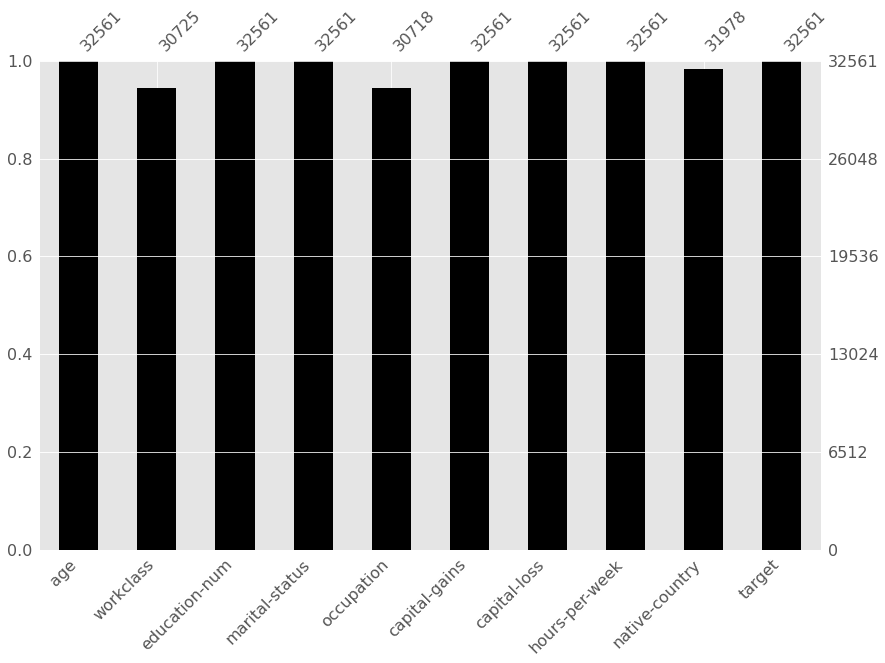

In [7]:
msno.bar(df, figsize=(14, 9), color='k')